In [1]:
#importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import warnings
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scipy
#warnings.filterwarnings('ignore')
import scipy
import seaborn as sns
from sklearn import preprocessing, cluster
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder

In [3]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot


# Reading in the data into Dataframe into Dataframe

In [4]:
accident = pd.read_csv('Road Safety Data - Accidents 2019.csv')
casualities = pd.read_csv('Road Safety Data - Casualties 2019.csv')
vehicles = pd.read_csv('Road Safety Data- Vehicles 2019.csv')


C:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: DtypeWarning: Columns (0,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
accident.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,-1,-1,4,1,1,0,0,1,3,E01003117
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000943
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000973
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000546


In [6]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               117536 non-null  object 
 1   Location_Easting_OSGR                        117508 non-null  float64
 2   Location_Northing_OSGR                       117508 non-null  float64
 3   Longitude                                    117508 non-null  float64
 4   Latitude                                     117508 non-null  float64
 5   Police_Force                                 117536 non-null  int64  
 6   Accident_Severity                            117536 non-null  int64  
 7   Number_of_Vehicles                           117536 non-null  int64  
 8   Number_of_Casualties                         117536 non-null  int64  
 9   Date                                         117536 non-nul

In [7]:
casualities.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2019010128300,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2
1,2019010128300,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5
2,2019010128300,1,3,2,2,-1,-1,3,0,0,2,0,0,9,1,5
3,2019010152270,1,1,1,2,24,5,3,0,0,0,0,0,9,1,3
4,2019010155191,2,1,2,2,21,5,3,0,0,0,0,0,1,1,1


In [8]:
casualities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153158 entries, 0 to 153157
Data columns (total 16 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Accident_Index                      153158 non-null  object
 1   Vehicle_Reference                   153158 non-null  int64 
 2   Casualty_Reference                  153158 non-null  int64 
 3   Casualty_Class                      153158 non-null  int64 
 4   Sex_of_Casualty                     153158 non-null  int64 
 5   Age_of_Casualty                     153158 non-null  int64 
 6   Age_Band_of_Casualty                153158 non-null  int64 
 7   Casualty_Severity                   153158 non-null  int64 
 8   Pedestrian_Location                 153158 non-null  int64 
 9   Pedestrian_Movement                 153158 non-null  int64 
 10  Car_Passenger                       153158 non-null  int64 
 11  Bus_or_Coach_Passenger              153

In [9]:
vehicles.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,1,9,0,-1,-1,-1,-1,-1,-1,...,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,2,9,0,-1,-1,-1,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,2,1,2
2,2019010152270,1,9,0,18,-1,0,-1,-1,-1,...,6,2,24,5,-1,-1,-1,3,1,3
3,2019010152270,2,9,0,18,-1,0,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,6,1,6
4,2019010155191,1,9,0,3,0,1,0,0,0,...,6,1,45,7,-1,-1,-1,4,1,4


In [10]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216381 entries, 0 to 216380
Data columns (total 23 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Accident_Index                    216381 non-null  object
 1   Vehicle_Reference                 216381 non-null  int64 
 2   Vehicle_Type                      216381 non-null  int64 
 3   Towing_and_Articulation           216381 non-null  int64 
 4   Vehicle_Manoeuvre                 216381 non-null  int64 
 5   Vehicle_Location-Restricted_Lane  216381 non-null  int64 
 6   Junction_Location                 216381 non-null  int64 
 7   Skidding_and_Overturning          216381 non-null  int64 
 8   Hit_Object_in_Carriageway         216381 non-null  int64 
 9   Vehicle_Leaving_Carriageway       216381 non-null  int64 
 10  Hit_Object_off_Carriageway        216381 non-null  int64 
 11  1st_Point_of_Impact               216381 non-null  int64 
 12  Wa

# Merging Dataframe

In [11]:
merged_df = vehicles.merge(casualities, on ='Accident_Index')

In [12]:
d_frame = merged_df.merge(accident, on = 'Accident_Index')

In [13]:
d_frame.shape

(210440, 69)

In [14]:
d_frame.head()

,Accident_Index,Vehicle_Reference_x,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,1,9,0,-1,-1,-1,-1,-1,-1,...,0,5,1,1,1,0,0,1,3,E01004762
1,2019010128300,1,9,0,-1,-1,-1,-1,-1,-1,...,0,5,1,1,1,0,0,1,3,E01004762
2,2019010128300,1,9,0,-1,-1,-1,-1,-1,-1,...,0,5,1,1,1,0,0,1,3,E01004762
3,2019010128300,2,9,0,-1,-1,-1,-1,-1,-1,...,0,5,1,1,1,0,0,1,3,E01004762
4,2019010128300,2,9,0,-1,-1,-1,-1,-1,-1,...,0,5,1,1,1,0,0,1,3,E01004762


# Data Cleaning 

In [15]:
#changing the accident index to string
accident['Accident_Index'] = accident['Accident_Index'].astype(str)
vehicles['Accident_Index'] = vehicles['Accident_Index'].astype(str)
casualities['Accident_Index'] = casualities['Accident_Index'].astype(str)

In [16]:
accident.isnull().sum()

Accident_Index                                    0
Location_Easting_OSGR                            28
Location_Northing_OSGR                           28
Longitude                                        28
Latitude                                         28
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             63
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

In [17]:
accident.drop(columns=["LSOA_of_Accident_Location","Location_Easting_OSGR","Location_Northing_OSGR"], axis = 1, inplace = True)

In [18]:
vehicles.isnull().sum()

Accident_Index                      0
Vehicle_Reference                   0
Vehicle_Type                        0
Towing_and_Articulation             0
Vehicle_Manoeuvre                   0
Vehicle_Location-Restricted_Lane    0
Junction_Location                   0
Skidding_and_Overturning            0
Hit_Object_in_Carriageway           0
Vehicle_Leaving_Carriageway         0
Hit_Object_off_Carriageway          0
1st_Point_of_Impact                 0
Was_Vehicle_Left_Hand_Drive?        0
Journey_Purpose_of_Driver           0
Sex_of_Driver                       0
Age_of_Driver                       0
Age_Band_of_Driver                  0
Engine_Capacity_(CC)                0
Propulsion_Code                     0
Age_of_Vehicle                      0
Driver_IMD_Decile                   0
Driver_Home_Area_Type               0
Vehicle_IMD_Decile                  0
dtype: int64

In [19]:
casualities.isnull().sum()

Accident_Index                        0
Vehicle_Reference                     0
Casualty_Reference                    0
Casualty_Class                        0
Sex_of_Casualty                       0
Age_of_Casualty                       0
Age_Band_of_Casualty                  0
Casualty_Severity                     0
Pedestrian_Location                   0
Pedestrian_Movement                   0
Car_Passenger                         0
Bus_or_Coach_Passenger                0
Pedestrian_Road_Maintenance_Worker    0
Casualty_Type                         0
Casualty_Home_Area_Type               0
Casualty_IMD_Decile                   0
dtype: int64

In [20]:
d_frame.isnull().sum().sort_values(ascending=False)

LSOA_of_Accident_Location             14207
Time                                    113
Location_Easting_OSGR                    80
Location_Northing_OSGR                   80
Longitude                                80
                                      ...  
Casualty_Severity                         0
Pedestrian_Location                       0
Pedestrian_Movement                       0
Car_Passenger                             0
Pedestrian_Road_Maintenance_Worker        0
Length: 69, dtype: int64

In [21]:
d_frame.isnull().sum().sort_values(ascending=False)

LSOA_of_Accident_Location             14207
Time                                    113
Location_Easting_OSGR                    80
Location_Northing_OSGR                   80
Longitude                                80
                                      ...  
Casualty_Severity                         0
Pedestrian_Location                       0
Pedestrian_Movement                       0
Car_Passenger                             0
Pedestrian_Road_Maintenance_Worker        0
Length: 69, dtype: int64

In [22]:
accident['Converted_Time'] = pd.to_datetime(accident['Time'], format = '%H:%M').dt.hour # convert time to the nearest hour

In [23]:
d_frame["Time"].mode

<bound method Series.mode of 0         17:50
1         17:50
2         17:50
3         17:50
4         17:50
          ...  
210435    08:46
210436    15:30
210437    15:30
210438    14:10
210439    12:45
Name: Time, Length: 210440, dtype: object>

In [24]:
d_frame["Time"] = d_frame["Time"].fillna(d_frame["Time"].mode()[0])
d_frame["Longitude"] = d_frame["Longitude"].fillna(d_frame["Longitude"].mode()[0])
d_frame["Latitude"] = d_frame["Latitude"].fillna(d_frame["Latitude"].mode()[0])

In [25]:
d_frame.isnull().sum().sort_values(ascending=False)

LSOA_of_Accident_Location             14207
Location_Easting_OSGR                    80
Location_Northing_OSGR                   80
Number_of_Casualties                      0
Local_Authority_(Highway)                 0
                                      ...  
Casualty_Severity                         0
Pedestrian_Location                       0
Pedestrian_Movement                       0
Car_Passenger                             0
Pedestrian_Road_Maintenance_Worker        0
Length: 69, dtype: int64

# Load all lookup sheets per feature in all the three datasets (accident, vehicle, casualties)

In [26]:
var_lookup = pd.read_excel('variable lookup.xls', sheet_name=None)

In [27]:
var_lookup.keys()

dict_keys(['Introduction', 'Export Variables', 'Police Force', 'Accident Severity', 'Day of Week', 'Local Authority (District)', 'Local Authority (Highway)', '1st Road Class', 'Road Type', 'Speed Limit', 'Junction Detail', 'Junction Control', '2nd Road Class', 'Ped Cross - Human', 'Ped Cross - Physical', 'Light Conditions', 'Weather', 'Road Surface', 'Special Conditions at Site', 'Carriageway Hazards', 'Urban Rural', 'Police Officer Attend', 'Vehicle Type', 'Towing and Articulation', 'Vehicle Manoeuvre', 'Vehicle Location', 'Junction Location', 'Skidding and Overturning', 'Hit Object in Carriageway', 'Veh Leaving Carriageway', 'Hit Object Off Carriageway', '1st Point of Impact', 'Was Vehicle Left Hand Drive', 'Journey Purpose', 'Sex of Driver', 'Age Band', 'Vehicle Propulsion Code', 'Casualty Class', 'Sex of Casualty', 'Age of Casualty', 'Casualty Severity', 'Ped Location', 'Ped Movement', 'Car Passenger', 'Bus Passenger', 'Ped Road Maintenance Worker', 'Casualty Type', 'IMD Decile', '

In [28]:
# Renaming the columns which doesn't fall in the pattern

accident=accident.rename(columns = {'Weather_Conditions' : 'Weather',
'Pedestrian_Crossing-Human_Control' : 'Ped Cross - Human',
'Pedestrian_Crossing-Physical_Facilities' : 'Ped Cross - Physical',
'Urban_or_Rural_Area' : 'Urban Rural',
'Road_Surface_Conditions' : 'Road Surface',
'Did_Police_Officer_Attend_Scene_of_Accident' : 'Police Officer Attend'})

In [29]:
# To check if all the sheets have same naming convention
for key in var_lookup.keys():
    print(var_lookup[key].columns)

Index(['Data Guide'], dtype='object')
Index(['VARIABLES', 'Unnamed: 1', 'Unnamed: 2'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['Code', 'Label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='object')
Index(['code', 'label'], dtype='obje

In [30]:
for col in accident.columns:
    if col.lower().replace('_', ' ') in list(
        [each_key.lower() for each_key in var_lookup.keys()]):
        print(col)

Police_Force
Accident_Severity
Day_of_Week
Local_Authority_(District)
Local_Authority_(Highway)
1st_Road_Class
Road_Type
Speed_limit
Junction_Detail
Junction_Control
2nd_Road_Class
Ped Cross - Human
Ped Cross - Physical
Light_Conditions
Weather
Road Surface
Special_Conditions_at_Site
Carriageway_Hazards
Urban Rural
Police Officer Attend


In [31]:
accident_decode = accident.copy()

# Mapping

In [32]:
def create_dict(df_var_look_up):
    ''' To generate a dictionary in the format {code : label}'''
    temp_dict = {}
    df_var_look_up.columns = [
        each_col.lower() for each_col in df_var_look_up.columns]
    for each1, each2 in zip(df_var_look_up['code'], df_var_look_up['label']):
        temp_dict[each1] = each2
    return temp_dict

In [33]:
%%time

# accident: Dataframe for all accidents in the UK in 2019
# var_lookup: Dictionary of dataframes of the Variable data look up excel

for column in accident.columns:
    for sheet in list(var_lookup.keys()):
        if column.lower().replace('_', ' ') == sheet.lower():
            print(column)
            print(sheet)
            # print(accident[column].map(create_dict(var_lookup[sheet]), na_action='ignore'))
            accident_decode[column] = accident[column].map(
                create_dict(var_lookup[sheet]), na_action='ignore')
            break

Police_Force
Police Force
Accident_Severity
Accident Severity
Day_of_Week
Day of Week
Local_Authority_(District)
Local Authority (District)
Local_Authority_(Highway)
Local Authority (Highway)
1st_Road_Class
1st Road Class
Road_Type
Road Type
Speed_limit
Speed Limit
Junction_Detail
Junction Detail
Junction_Control
Junction Control
2nd_Road_Class
2nd Road Class
Ped Cross - Human
Ped Cross - Human
Ped Cross - Physical
Ped Cross - Physical
Light_Conditions
Light Conditions
Weather
Weather
Road Surface
Road Surface
Special_Conditions_at_Site
Special Conditions at Site
Carriageway_Hazards
Carriageway Hazards
Urban Rural
Urban Rural
Police Officer Attend
Police Officer Attend
Wall time: 434 ms


In [34]:
accident_decode.head()

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Ped Cross - Human,Ped Cross - Physical,Light_Conditions,Weather,Road Surface,Special_Conditions_at_Site,Carriageway_Hazards,Urban Rural,Police Officer Attend,Converted_Time
0,2019010128300,-0.153842,51.508057,Metropolitan Police,Slight,2,3,18/02/2019,Monday,17:50,...,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight,Fine no high winds,Dry,None,None,Urban,No - accident was reported using a self comple...,17.0
1,2019010152270,-0.127949,51.436208,Metropolitan Police,Slight,2,1,15/01/2019,Tuesday,21:45,...,Data missing or out of range,Data missing or out of range,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,No - accident was reported using a self comple...,21.0
2,2019010155191,-0.124193,51.526795,Metropolitan Police,Slight,2,1,01/01/2019,Tuesday,01:50,...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,1.0
3,2019010155192,-0.191044,51.546387,Metropolitan Police,Serious,1,1,01/01/2019,Tuesday,01:20,...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,1.0
4,2019010155194,-0.200064,51.541121,Metropolitan Police,Slight,2,2,01/01/2019,Tuesday,00:40,...,None within 50 metres,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,0.0


In [35]:
casualities.columns

Index(['Accident_Index', 'Vehicle_Reference', 'Casualty_Reference',
       'Casualty_Class', 'Sex_of_Casualty', 'Age_of_Casualty',
       'Age_Band_of_Casualty', 'Casualty_Severity', 'Pedestrian_Location',
       'Pedestrian_Movement', 'Car_Passenger', 'Bus_or_Coach_Passenger',
       'Pedestrian_Road_Maintenance_Worker', 'Casualty_Type',
       'Casualty_Home_Area_Type', 'Casualty_IMD_Decile'],
      dtype='object')

In [36]:
casualities=casualities.rename(columns = {'Pedestrian_Location' : 'Pedestrian Location',
'Pedestrian_Movement' : 'Pedestrian Movement',
'Bus_or_Coach_Passenger' : 'Bus or Coach Passenger',
'Pedestrian_Road_Maintenance_Worker' : 'Pedestrian Road Maintenance Worker',
'Casualty_Home_Area_Type' : 'Casualty Home Area Type',
'Casualty_IMD_Decile' : 'Casualty IMD Decile',
})

In [37]:
for col in casualities.columns:
    if col.lower().replace('_', ' ') in list(
        [each_key.lower() for each_key in var_lookup.keys()]):
        print(col)

Casualty_Class
Sex_of_Casualty
Age_of_Casualty
Casualty_Severity
Car_Passenger
Casualty_Type


In [38]:
casualities_decode = casualities.copy()

In [39]:
%%time

# casuality: Dataframe for all casualities in accidents in the UK in 2019
# var_lookup: Dictionary of dataframes of the Variable data look up excel

for col in casualities.columns:
    for sheet in list(var_lookup.keys()):
        if col.lower().replace('_', ' ') == sheet.lower():
            print(col)
            print(sheet)
            casualities_decode[col] = casualities[col].map(
                create_dict(var_lookup[sheet]), na_action='ignore')
            break

Casualty_Class
Casualty Class
Sex_of_Casualty
Sex of Casualty
Age_of_Casualty
Age of Casualty
Casualty_Severity
Casualty Severity
Car_Passenger
Car Passenger
Casualty_Type
Casualty Type
Wall time: 182 ms


In [40]:
vehicles.columns

Index(['Accident_Index', 'Vehicle_Reference', 'Vehicle_Type',
       'Towing_and_Articulation', 'Vehicle_Manoeuvre',
       'Vehicle_Location-Restricted_Lane', 'Junction_Location',
       'Skidding_and_Overturning', 'Hit_Object_in_Carriageway',
       'Vehicle_Leaving_Carriageway', 'Hit_Object_off_Carriageway',
       '1st_Point_of_Impact', 'Was_Vehicle_Left_Hand_Drive?',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver',
       'Age_Band_of_Driver', 'Engine_Capacity_(CC)', 'Propulsion_Code',
       'Age_of_Vehicle', 'Driver_IMD_Decile', 'Driver_Home_Area_Type',
       'Vehicle_IMD_Decile'],
      dtype='object')

In [41]:
for col in vehicles.columns:
    if col.lower().replace('_', ' ') in list(
        [each_key.lower() for each_key in var_lookup.keys()]):
        print(col)

Vehicle_Type
Towing_and_Articulation
Vehicle_Manoeuvre
Junction_Location
Skidding_and_Overturning
Hit_Object_in_Carriageway
Hit_Object_off_Carriageway
1st_Point_of_Impact
Sex_of_Driver


In [42]:
vehicles=vehicles.rename(columns = {'Vehicle_Location-Restricted_Lane' : 'Vehicle Location',
'Vehicle_Leaving_Carriageway' : 'Vehicles Leaving Carriageway',
'Was_Vehicle_Left_Hand_Drive?' : 'Was Vehicle Left Hand Drive',
'Journey_Purpose_of_Driver' : 'Driver Journey Purpose',
'Age_Band_of_Driver' : 'Driver Age Band',
'Propulsion_Code' : 'Propulsion Code',
})

In [43]:
vehicles_decode = vehicles.copy()

In [44]:
def create_dict(var_look_up):
    ''' To generate a dictionary in the format {code : label}'''
    temp_dict = {}

    var_look_up.columns = [
        each_col.lower() for each_col in var_look_up.columns
    ]
    for each1, each2 in zip(var_look_up['code'], var_look_up['label']):
        temp_dict[each1] = each2
    return temp_dict

In [45]:
%%time

# df_accidents: Dataframe for all accidents in the UK in 2019
# var_lookup: Dictionary of dataframes of the Variable data look up excel

for col in vehicles.columns:
    for sheet in list(var_lookup.keys()):
        if col.lower().replace('_', ' ') == sheet.lower():
            print(col)
            print(sheet)
            vehicles_decode[col] = vehicles[col].map(
                create_dict(var_lookup[sheet]), na_action='ignore')
            break

Vehicle_Type
Vehicle Type
Towing_and_Articulation
Towing and Articulation
Vehicle_Manoeuvre
Vehicle Manoeuvre
Vehicle Location
Vehicle Location
Junction_Location
Junction Location
Skidding_and_Overturning
Skidding and Overturning
Hit_Object_in_Carriageway
Hit Object in Carriageway
Hit_Object_off_Carriageway
Hit Object Off Carriageway
1st_Point_of_Impact
1st Point of Impact
Was Vehicle Left Hand Drive
Was Vehicle Left Hand Drive
Sex_of_Driver
Sex of Driver
Wall time: 438 ms


# Merging Dataframe

In [46]:
merged_df = vehicles_decode.merge(casualities_decode, on ='Accident_Index')

In [47]:
d_frame = merged_df.merge(accident_decode, on = 'Accident_Index')

In [48]:
d_frame.shape

(295579, 67)

In [49]:
d_frame.to_csv("merged_df.csv")

# EDA

# Accident by Time of the Day

In [50]:
def get_radian(x):
    h,m = map(int,x)
    return 2 * np.pi * (h + m/60)/24

In [51]:
Time_group= accident[-accident['Time'].isna()].groupby('Time')['Number_of_Casualties'].sum().reset_index()

In [52]:
Time_group.head()

,Time,Number_of_Casualties
0,00:01,212
1,00:02,28
2,00:03,44
3,00:04,44
4,00:05,95


In [53]:
time_series = Time_group['Time'].str.split(':')
time_series = time_series.apply(get_radian)
time_series.head()

0    0.004363
1    0.008727
2    0.013090
3    0.017453
4    0.021817
Name: Time, dtype: float64

In [54]:
accident['Time']

0         17:50
1         21:45
2         01:50
3         01:20
4         00:40
          ...  
117531    01:00
117532    08:46
117533    15:30
117534    14:10
117535    12:45
Name: Time, Length: 117536, dtype: object

In [55]:
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "morning rush (5-10)"
    elif hour >= 10 and hour < 15:
        return "office hours (10-15)"
    elif hour >= 15 and hour < 19:
        return "afternoon rush (15-19)"
    elif hour >= 19 and hour < 23:
        return "evening (19-23)"
    else:
        return "night (23-5)"

In [56]:
accident_decode['Time_Group'] = accident_decode['Converted_Time'].apply(when_was_it)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


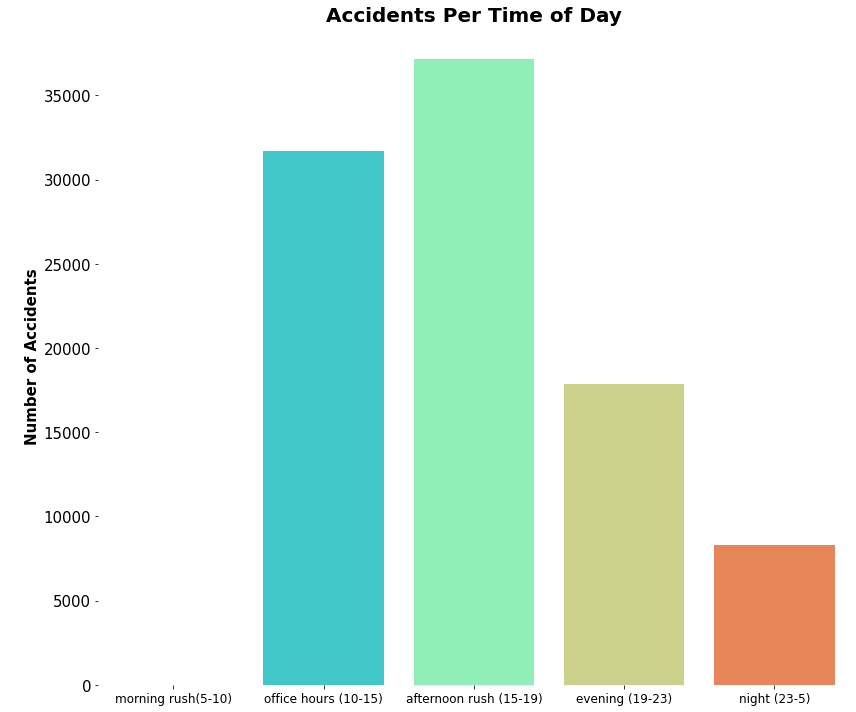

In [57]:
accident_pd= accident_decode.groupby(['Time_Group'])['Accident_Index'].count()

# prepare plot
# plt.style.use('dark_background')
plt.figure(figsize=(12,10))
time_frame=["morning rush(5-10)", "office hours (10-15)", "afternoon rush (15-19)",
     "evening (19-23)", "night (23-5)"]
sns.barplot(accident_pd.index,accident_pd.values, order=time_frame, palette='rainbow')
sns.despine(top=True, right=True, left=True, bottom=True)
plt.title("Accidents Per Time of Day",fontsize=20,fontweight="bold")
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)

plt.xlabel("", fontsize=15, fontweight="bold")
plt.ylabel("\nNumber of Accidents", fontsize=15, fontweight="bold")
plt.tight_layout()
plt.savefig('accidentpd.png')

In [58]:
# def plot_by_time_of_the_day(df, time_col_name, plot_col_name, plot_title=None):
#     """
#     Radial plot by time.

#     df: grouped dataframe
#     time_col_name: name of the time column in format HH:MM
#     plot_col_name: name of the column that contains estimated counts per time instance
#     plot_title: title of the plot
#     """
#     fig = plt.figure(figsize=(7, 7))
#     time_series = df[time_col_name].str.split(':')
#     time_series = time_series.apply(get_radian)
#     ax = plt.subplot(111, projection='polar')
#     ax.bar(time_series, df[plot_col_name], width=0.1, alpha=0.3, color='blue')

#     # clockwise labels
#     ax.set_theta_direction(-1)

#     # place Zero at 12AM
#     ax.set_theta_offset(np.pi / 2)

#     # set circumference ticks
#     ax.set_xticks(np.linspace(0, 2 * np.pi, 24, endpoint=False))

#     # set the label names
#     ticks = [
#         '12 AM', '1 AM', '2 AM', '3 AM', '4 AM', '5 AM', '6 AM', '7 AM',
#         '8 AM', '9 AM', '10 AM', '11 AM', '12 PM', '1 PM', '2 PM', '3 PM',
#         '4 PM', '5 PM', '6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM'
#     ]
#     ax.set_xticklabels(ticks)

#     # suppress the radial labels
#     plt.setp(ax.get_yticklabels(), visible=False)

#     # Radius
#     plt.ylim(0, max(df[plot_col_name]))

#     plt.title(plot_title, pad=30)

#     plt.show()

In [59]:
# def TimeBand(time):
#   if time  == 6 and  time < 10:
#     return 'Morning Rush'
#   elif time == 10 and  time < 12:
#     return 'Day'
#   elif time == 12 and  time < 14:
#     return 'Lunch Rush'
#   elif time == 14 and  time <16:
#     return 'Afternoon'
#   elif time == 16 and time < 18 :
#     return 'After Work Rush'
#   elif time == 18 and time < 22:
#     return 'Evening'
#   else :
#     return "Night"


# Number of Accidents per Day of the Week

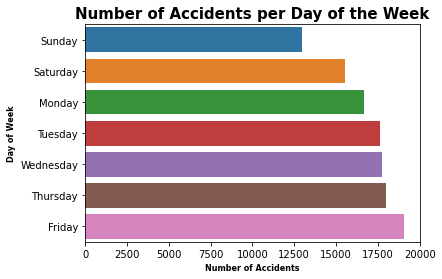

<Figure size 432x288 with 0 Axes>

In [126]:
sns.barplot(x='Accident_Index', y='Day_of_Week', data=accident_decode.groupby('Day_of_Week')['Accident_Index'].count().reset_index().sort_values(by='Accident_Index'))
plt.title("Number of Accidents per Day of the Week",fontsize=15,fontweight="bold")
plt.ylabel("Day of Week",fontsize=8,fontweight="bold")
plt.xlabel("Number of Accidents",fontsize=8,fontweight="bold")
plt.show()
plt.savefig('Numaccidentpd.png')

# For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur?

In [61]:
acc_vec = accident_decode.merge(vehicles_decode, on="Accident_Index")

In [62]:
#All motocycles accident
motorbikes = acc_vec[(acc_vec['Vehicle_Type'] == 'Motorcycle 50cc and under') | (acc_vec['Vehicle_Type'] == "Motorcycle 125cc and under") | (acc_vec['Vehicle_Type'] == "Motorcycle over 125cc and up to 500cc") | (acc_vec['Vehicle_Type'] == "Motorcycle over 500cc") | (acc_vec['Vehicle_Type'] == "Electric motorcycle") | (d_frame['Vehicle_Type'] == "Motorcycle - unknown cc")]

<ipython-input-62-d7c672196251>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  motorbikes = acc_vec[(acc_vec['Vehicle_Type'] == 'Motorcycle 50cc and under') | (acc_vec['Vehicle_Type'] == "Motorcycle 125cc and under") | (acc_vec['Vehicle_Type'] == "Motorcycle over 125cc and up to 500cc") | (acc_vec['Vehicle_Type'] == "Motorcycle over 500cc") | (acc_vec['Vehicle_Type'] == "Electric motorcycle") | (d_frame['Vehicle_Type'] == "Motorcycle - unknown cc")]


In [127]:
motorbikes['Time_Group']

30                  night (23-5)
39          office hours (10-15)
41        afternoon rush (15-19)
46          office hours (10-15)
49        afternoon rush (15-19)
                   ...          
216307      office hours (10-15)
216358      office hours (10-15)
216361      office hours (10-15)
216364      office hours (10-15)
216380      office hours (10-15)
Name: Time_Group, Length: 17290, dtype: object

# Motocycle accident per days of the week

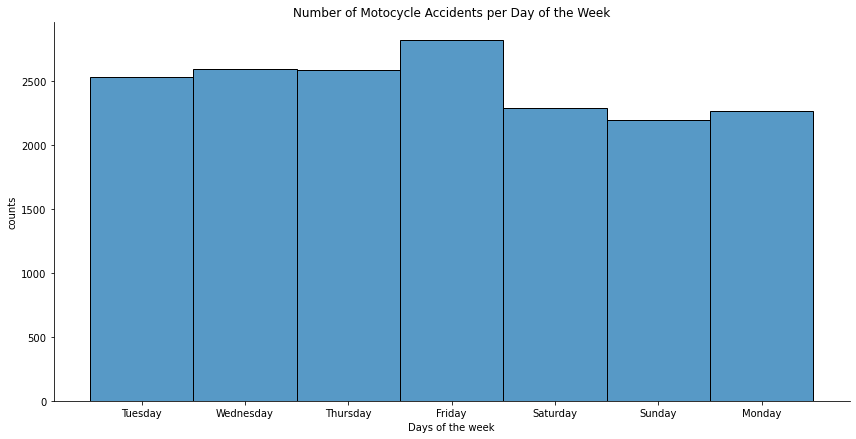

<Figure size 1080x1080 with 0 Axes>

In [132]:
sns.displot(data=motorbikes,x="Day_of_Week", height=6, aspect=12/6,   palette=sns.color_palette("husl", n_colors=9))
plt.title("Number of Motocycle Accidents per Day of the Week")
plt.ylabel("counts")
plt.xlabel("Days of the week" )
plt.figure(figsize = (15,15))

plt.show
plt.savefig('Motocycleacc.png')


# Motocycle accident per time

<function matplotlib.pyplot.show(*args, **kw)>

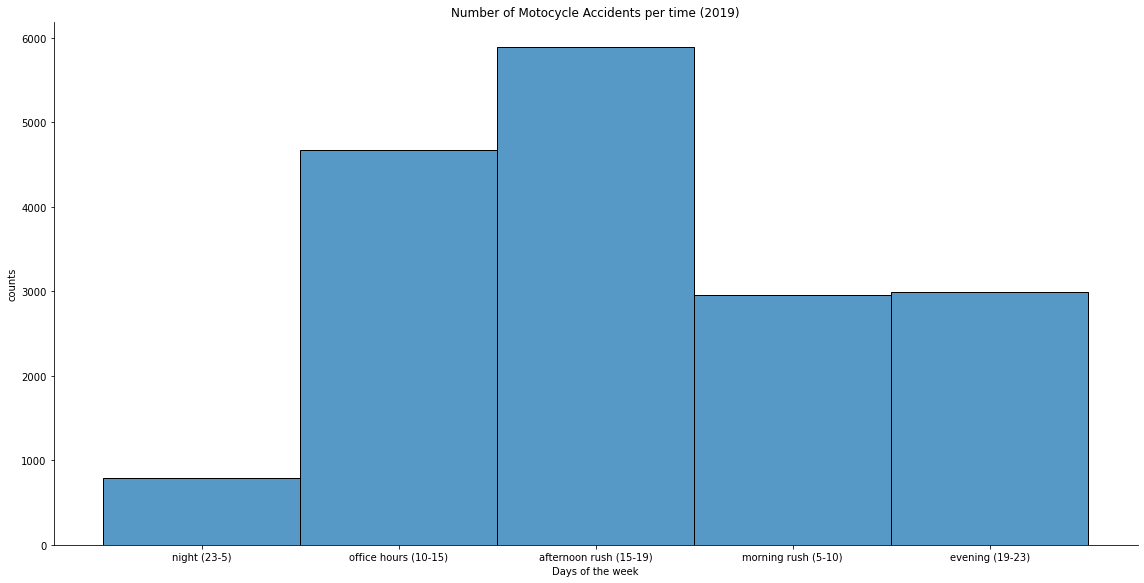

In [65]:
sns.displot(data=motorbikes,x= "Time_Group", height=8, aspect=12/6)
plt.title("Number of Motocycle Accidents per time (2019)")
plt.ylabel("counts")
plt.xlabel("Days of the week")
# plt.figure(figsize = (20,15))
plt.show

# Are there significant hours of the day, and days of the week, on which accidents occur for pedestrians?

In [66]:
ped_acc = accident_decode.merge(casualities_decode, on="Accident_Index")

In [67]:
df_ped= ped_acc[(ped_acc['Casualty_Type']=="Pedestrian")]

# Pedestrian accident per Day of the week

<function matplotlib.pyplot.show(*args, **kw)>

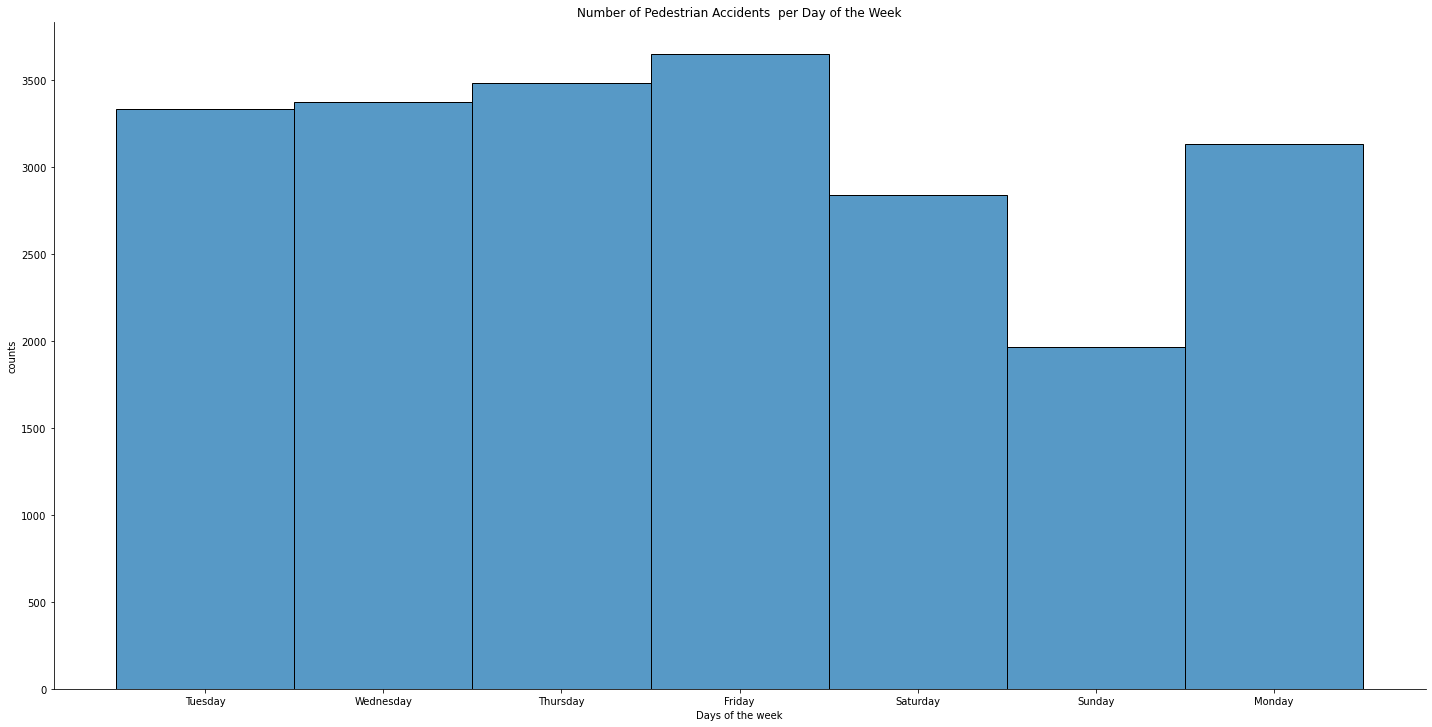

<Figure size 1440x1080 with 0 Axes>

In [68]:
sns.displot(data=df_ped,x="Day_of_Week", height=10, aspect=12/6, palette=sns.color_palette("husl", n_colors=6))
plt.title("Number of Pedestrian Accidents  per Day of the Week")
plt.ylabel("counts")
plt.xlabel("Days of the week")
plt.figure(figsize = (20,15))
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

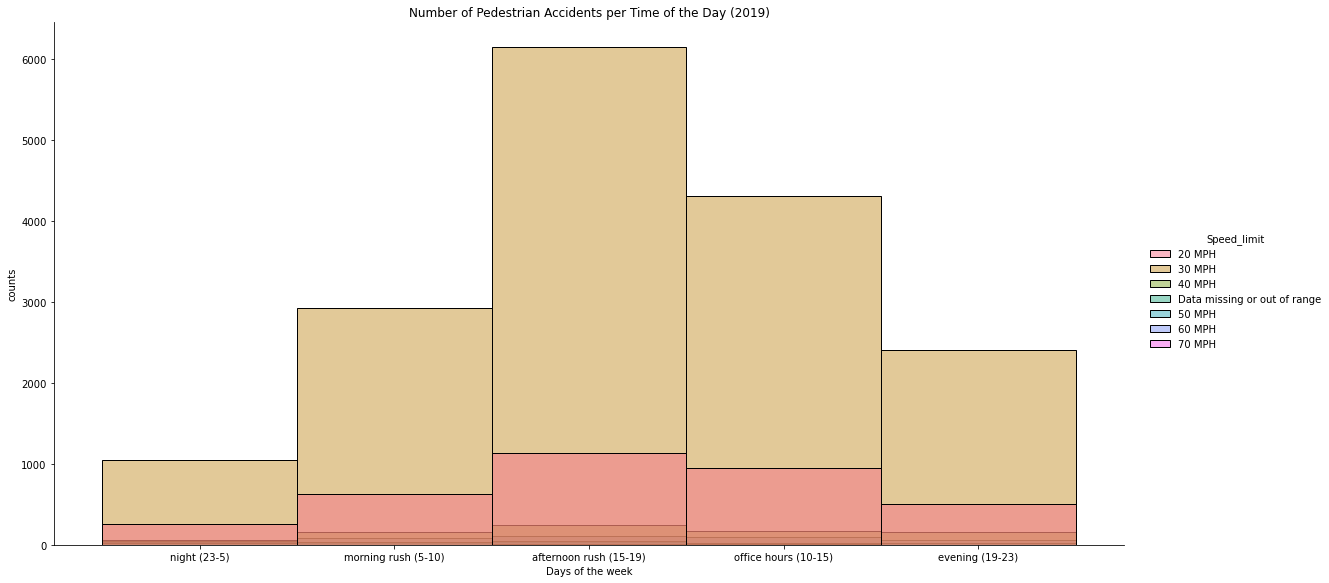

<Figure size 1440x1080 with 0 Axes>

In [69]:
sns.displot(data=df_ped,x="Time_Group", height=8, aspect=12/6,  hue="Speed_limit", palette=sns.color_palette("husl", n_colors=7))
plt.title("Number of Pedestrian Accidents per Time of the Day (2019)")
plt.ylabel("counts")
plt.xlabel("Days of the week")
plt.figure(figsize = (20,15))
plt.show

# What impact, if any, does daylight savings have on road traffic accidents in the week after it starts and stops?

In [70]:
accident['formatted_date'] = pd.to_datetime(accident['Date'])
accident['day_of_year'] = accident.formatted_date.apply(lambda x: x.dayofyear)
accident['week_of_year'] = accident.formatted_date.apply(lambda x: x.weekofyear)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, 'Number of Accidents'), Text(0.5, 0, 'Weeks')]

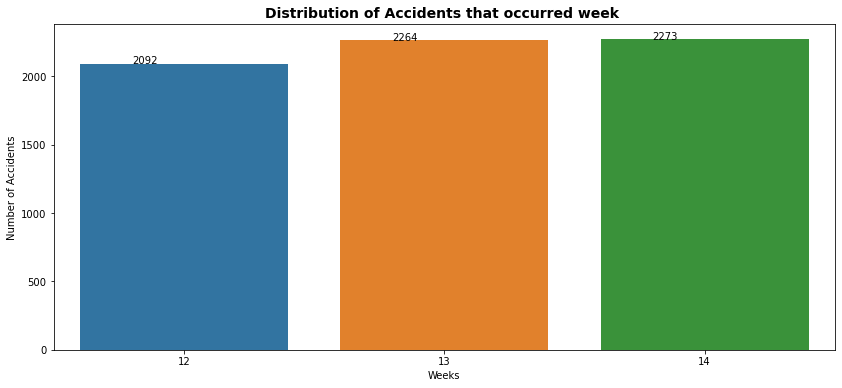

In [71]:
daylight_starts = accident[(accident['week_of_year'] == 12) | (accident['week_of_year'] == 13) | (accident['week_of_year'] == 14) ]
fig, ax = plt.subplots(figsize=(14,6))
# plot
ax = sns.countplot(daylight_starts['week_of_year'])
for p in ax.patches: ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.20, p.get_height()+0.01))
ax.set_title('Distribution of Accidents that occurred week ', fontsize=14, fontweight='bold')
ax.set(xlabel='Weeks', ylabel='Number of Accidents')

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0.5, 'Number of Accidents'), Text(0.5, 0, 'Weeks')]

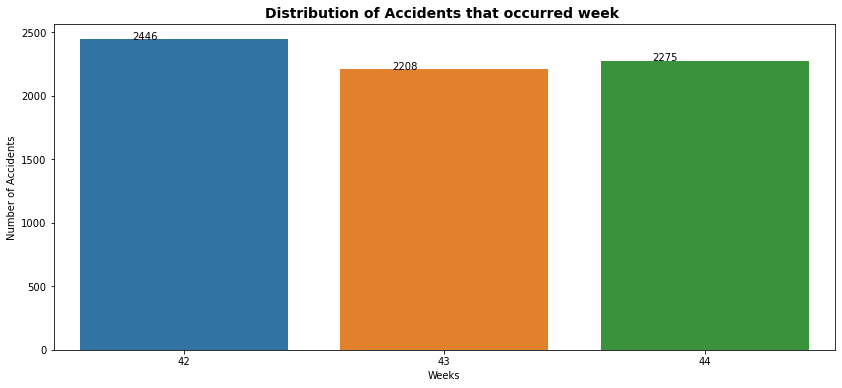

In [72]:
daylight_starts = accident[(accident['week_of_year'] == 42) | (accident['week_of_year'] == 43) | (accident['week_of_year'] == 44) ]
fig, ax = plt.subplots(figsize=(14,6))
# plot
ax = sns.countplot(daylight_starts['week_of_year'])
for p in ax.patches: ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.20, p.get_height()+0.01))
ax.set_title('Distribution of Accidents that occurred week ', fontsize=14, fontweight='bold')
ax.set(xlabel='Weeks', ylabel='Number of Accidents')

# Impact of sunrise and sunset times have on road traffic accidents

In [73]:
sunrise_time=accident[((accident["Converted_Time"] >= 6.0 ))] 

In [74]:
Sun_time=((sunrise_time['Number_of_Casualties'].sum())/(accident['Number_of_Casualties'].sum()))*100

In [75]:
print("The sunrise Impact on road traffic is: {:.2f} % ".format(Sun_time))

The sunrise Impact on road traffic is: 93.85 % 


In [76]:
accident['Date']

0         18/02/2019
1         15/01/2019
2         01/01/2019
3         01/01/2019
4         01/01/2019
             ...    
117531    18/05/2019
117532    30/05/2019
117533    21/06/2019
117534    29/06/2019
117535    21/04/2019
Name: Date, Length: 117536, dtype: object

In [77]:
from datetime import datetime, date

In [78]:
#Since sunrises and sets within 5 minutes
sunrise_time=accident[((accident["Converted_Time"] >= 6.0 )&(accident["Converted_Time"] <= 6.05))]

In [79]:
Suntime=((sunrise_time['Number_of_Casualties'].sum())/(accident['Number_of_Casualties'].sum()))*100

In [80]:
print("sunrise Impact on road traffic is: {:.2f} % ".format(Sun_time))

sunrise Impact on road traffic is: 93.85 % 


In [81]:
Sunset=accident[((accident["Converted_Time"] >= 18.0 ))] 

In [82]:
sunset_time=((Sunset['Number_of_Casualties'].sum())/(accident['Number_of_Casualties'].sum()))*100

In [83]:
print("sunset Impact on road traffic is: {:.2f} % ".format(sunset_time))

sunset Impact on road traffic is: 24.83 % 


In [84]:
accident_decode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117536 entries, 0 to 117535
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              117536 non-null  object 
 1   Longitude                   117508 non-null  float64
 2   Latitude                    117508 non-null  float64
 3   Police_Force                117536 non-null  object 
 4   Accident_Severity           117536 non-null  object 
 5   Number_of_Vehicles          117536 non-null  int64  
 6   Number_of_Casualties        117536 non-null  int64  
 7   Date                        117536 non-null  object 
 8   Day_of_Week                 117536 non-null  object 
 9   Time                        117473 non-null  object 
 10  Local_Authority_(District)  117536 non-null  object 
 11  Local_Authority_(Highway)   117536 non-null  object 
 12  1st_Road_Class              117536 non-null  object 
 13  1st_Road_Numbe

In [85]:
# we then append them into one dataframe
sunrise_sunset=sunrise_time.append(Sunset)

In [86]:
total_rise_set=((sunrise_sunset['Number_of_Casualties'].sum())/(accident['Number_of_Casualties'].sum()))*100

In [87]:
print("Impact of sunrise and sunset on road traffic is: {:.2f} % ".format(total_rise_set))

Impact of sunrise and sunset on road traffic is: 26.77 % 


# Are there particular types of vehicles (engine capacity, age of vehicle, etc.) that are more frequently involved in road traffic accidents?

In [88]:
engine_cap = vehicles[['Engine_Capacity_(CC)','Age_of_Vehicle']]

In [89]:
features = ["Engine_Capacity_(CC)",	"Age_of_Vehicle"]

In [90]:
kmeans = KMeans(n_clusters=25)

In [91]:
x = vehicles.loc[:, features].values

In [92]:
kmeans.fit(x)

KMeans(n_clusters=25)

In [93]:
labels = kmeans.predict(x)

In [94]:
centriods = kmeans.cluster_centers_

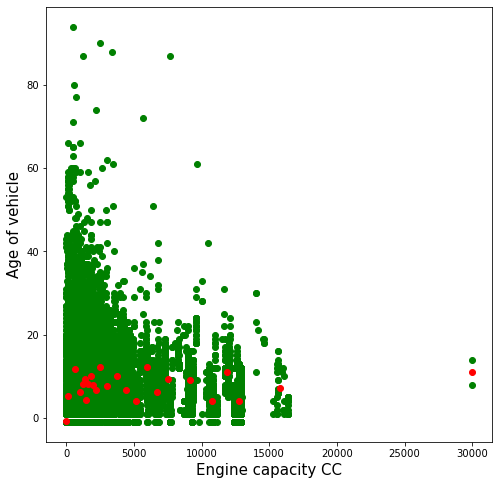

In [95]:
fig = plt.figure(figsize=(8,8))
colors = map(lambda x: colmap[x+1], labels)
plt.xlabel('Engine capacity CC',fontdict = {'fontsize' : 15})
plt.ylabel('Age of vehicle',fontdict = {'fontsize' : 15})
plt.scatter(engine_cap['Engine_Capacity_(CC)'],engine_cap['Age_of_Vehicle'],color="green")
plt.scatter(centriods[:,0],centriods[:,1],color="red")
plt.show()

# Are there particular conditions (weather, geographic location, situations) that generate more road traffic accidents?


# Weather Conditions

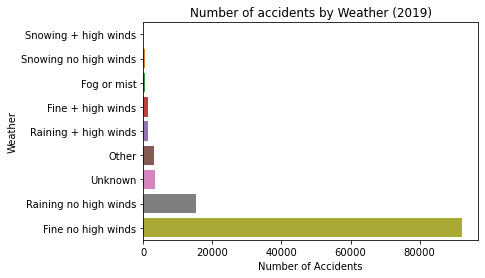

In [96]:
sns.barplot(x='Accident_Index', y='Weather', data=accident_decode.groupby('Weather')['Accident_Index'].count().reset_index().sort_values(by='Accident_Index'))
plt.title("Number of accidents by Weather (2019)")
plt.xlabel("Number of Accidents")
plt.show()

In [97]:
accident_decode.groupby(['Weather', 'Road Surface'])[['Accident_Index'
]].count().reset_index().sort_values(by='Weather')

,Weather,Road Surface,Accident_Index
0,Fine + high winds,Data missing or out of range,4
1,Fine + high winds,Dry,761
2,Fine + high winds,Flood over 3cm. deep,3
3,Fine + high winds,Frost or ice,14
4,Fine + high winds,Snow,1
5,Fine + high winds,Wet or damp,447
6,Fine no high winds,Data missing or out of range,283
7,Fine no high winds,Dry,77791
8,Fine no high winds,Flood over 3cm. deep,21
9,Fine no high winds,Frost or ice,713


# Geographical location (Urban or Rural)

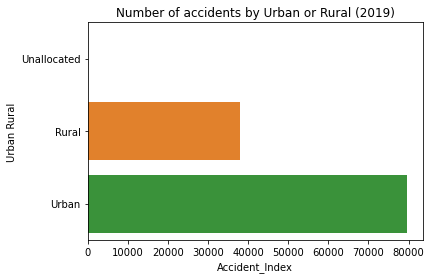

In [98]:
sns.barplot(x='Accident_Index', y='Urban Rural', data=accident_decode.groupby('Urban Rural')['Accident_Index'].count().reset_index().sort_values(by='Accident_Index'))
plt.title("Number of accidents by Urban or Rural (2019)")
plt.show()

# How does driver related variables affect the outcome (e.g., age of the driver, and the purpose of the journey)?

In [99]:
Vehicle_accident=accident.merge(vehicles, on=['Accident_Index'], how='inner')

In [100]:
predict = ['Age_of_Driver','Driver Journey Purpose','Sex_of_Driver','Age_of_Vehicle','Day_of_Week']

In [101]:
dataframe = Vehicle_accident.dropna()
dataframe.reset_index(drop=True)

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Driver Journey Purpose,Sex_of_Driver,Age_of_Driver,Driver Age Band,Engine_Capacity_(CC),Propulsion Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,...,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,-0.153842,51.508057,1,3,2,3,18/02/2019,2,17:50,...,6,3,-1,-1,-1,-1,-1,2,1,2
2,2019010152270,-0.127949,51.436208,1,3,2,1,15/01/2019,3,21:45,...,6,2,24,5,-1,-1,-1,3,1,3
3,2019010152270,-0.127949,51.436208,1,3,2,1,15/01/2019,3,21:45,...,6,3,-1,-1,-1,-1,-1,6,1,6
4,2019010155191,-0.124193,51.526795,1,3,2,1,01/01/2019,3,01:50,...,6,1,45,7,-1,-1,-1,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216207,2019984107019,-2.983499,55.215407,98,3,4,1,30/05/2019,5,08:46,...,1,1,20,4,2198,2,4,5,3,5
216208,2019984107219,-3.274645,54.991685,98,3,2,1,21/06/2019,6,15:30,...,6,1,33,6,1997,2,12,3,2,3
216209,2019984107219,-3.274645,54.991685,98,3,2,1,21/06/2019,6,15:30,...,6,1,61,9,2967,2,5,7,3,7
216210,2019984107419,-2.997491,55.148292,98,3,1,1,29/06/2019,7,14:10,...,5,1,78,11,1597,2,6,8,3,8


In [102]:
df_filter = dataframe.filter( ['Age_of_Driver','Driver Journey Purpose','Accident_Severity','Sex_of_Driver','Age_of_Vehicle','Day_of_Week'], axis=1)
df_filter

,Age_of_Driver,Driver Journey Purpose,Accident_Severity,Sex_of_Driver,Age_of_Vehicle,Day_of_Week
0,58,6,3,1,-1,2
1,-1,6,3,3,-1,2
2,24,6,3,2,-1,3
3,-1,6,3,3,-1,3
4,45,6,3,1,-1,3
...,...,...,...,...,...,...
216376,20,1,3,1,4,5
216377,33,6,3,1,12,6
216378,61,6,3,1,5,6
216379,78,5,3,1,6,7


In [103]:
df = dataframe[(dataframe['Age_of_Driver'] > 0) & (dataframe['Driver Journey Purpose'] > 0) & (dataframe['Sex_of_Driver'] > 0) & (dataframe['Age_of_Vehicle'] > 0)& (dataframe['Day_of_Week'] > 0)]
df

,Accident_Index,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,...,Driver Journey Purpose,Sex_of_Driver,Age_of_Driver,Driver Age Band,Engine_Capacity_(CC),Propulsion Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
15,2019010155206,0.141957,51.572326,1,3,2,1,01/01/2019,3,01:15,...,6,2,81,11,1242,1,4,-1,-1,-1
21,2019010155210,-0.021065,51.533238,1,1,1,1,01/01/2019,3,03:00,...,1,1,33,6,2198,2,4,-1,-1,-1
24,2019010155217,0.070277,51.557075,1,2,2,1,01/01/2019,3,04:10,...,1,1,30,6,1499,1,1,-1,-1,-1
105,2019010155425,-0.078765,51.561751,1,3,1,1,02/01/2019,4,15:07,...,6,1,23,5,2996,1,1,2,1,2
181,2019010155627,-0.264403,51.498486,1,2,2,1,03/01/2019,5,18:45,...,1,1,25,5,125,1,1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216376,2019984107019,-2.983499,55.215407,98,3,4,1,30/05/2019,5,08:46,...,1,1,20,4,2198,2,4,5,3,5
216377,2019984107219,-3.274645,54.991685,98,3,2,1,21/06/2019,6,15:30,...,6,1,33,6,1997,2,12,3,2,3
216378,2019984107219,-3.274645,54.991685,98,3,2,1,21/06/2019,6,15:30,...,6,1,61,9,2967,2,5,7,3,7
216379,2019984107419,-2.997491,55.148292,98,3,1,1,29/06/2019,7,14:10,...,5,1,78,11,1597,2,6,8,3,8


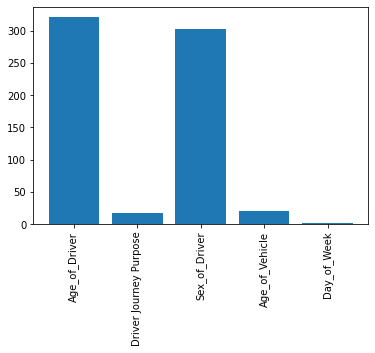

In [104]:
# Perform the feature selection
selection = SelectKBest(f_classif, k="all")
selection.fit(dataframe[predict], dataframe["Accident_Severity"])

# We will get the p-values for each feature and then transform from p-values into some scores
df_scores = -np.log10(selection.pvalues_)
# Using plt to plot the scores  
plt.bar(range(len(predict)), df_scores)
plt.xticks(range(len(predict)), predict, rotation='vertical')
plt.show()

# Can we make predictions about when and where accidents will occur, and the severity of the injuries sustained from the data supplied to improve road safety? How well do our models compare to government models?

In [105]:
my_df = accident.merge(vehicles, on="Accident_Index")

In [106]:
my_data = my_df.merge(casualities, on="Accident_Index")

In [107]:
my_data.isnull().sum()

Accident_Index                         0
Longitude                             83
Latitude                              83
Police_Force                           0
Accident_Severity                      0
                                      ..
Bus or Coach Passenger                 0
Pedestrian Road Maintenance Worker     0
Casualty_Type                          0
Casualty Home Area Type                0
Casualty IMD Decile                    0
Length: 70, dtype: int64

In [108]:
#correlation by accident severity using pearson
corr_df=my_data.apply(LabelEncoder().fit_transform)
standard_sc = StandardScaler()
corrl_df = standard_sc.fit_transform(corr_df)
correl_df=pd.DataFrame(data=corrl_df,columns=my_data.columns)
corr_data=correl_df.corr()["Accident_Severity"]
corr_data[np.argsort(corr_data,axis=0)[::-1]]

Accident_Severity        1.000000
Casualty_Severity        0.826459
Police Officer Attend    0.154321
Sex_of_Driver            0.082202
2nd_Road_Class           0.071022
                           ...   
Vehicle_Manoeuvre       -0.125144
Casualty_Reference      -0.126162
Speed_limit             -0.139709
Urban Rural             -0.141979
Number_of_Casualties    -0.180308
Name: Accident_Severity, Length: 70, dtype: float64

In [109]:
features = ["Casualty_Severity","Accident_Severity","Sex_of_Driver","Police Officer Attend","2nd_Road_Class","Location_Easting_OSGR","Junction_Control","Weather","Casualty_Type","Junction_Detail","Ped Cross - Physical","Journey Purpose","1st_Road_Class","Vehicle_Type","Number_of_Vehicles","2nd_Road_Number","Engine_Capacity_(CC)","Day_of_Week","Junction_Location","1st_Point_of_Impact"]

In [110]:
features

['Casualty_Severity',
 'Accident_Severity',
 'Sex_of_Driver',
 'Police Officer Attend',
 '2nd_Road_Class',
 'Location_Easting_OSGR',
 'Junction_Control',
 'Weather',
 'Casualty_Type',
 'Junction_Detail',
 'Ped Cross - Physical',
 'Journey Purpose',
 '1st_Road_Class',
 'Vehicle_Type',
 'Number_of_Vehicles',
 '2nd_Road_Number',
 'Engine_Capacity_(CC)',
 'Day_of_Week',
 'Junction_Location',
 '1st_Point_of_Impact']

In [111]:
data_d = my_data.filter(features,  axis=1)

In [112]:
data_d.isnull().sum()

Casualty_Severity        0
Accident_Severity        0
Sex_of_Driver            0
Police Officer Attend    0
2nd_Road_Class           0
Junction_Control         0
Weather                  0
Casualty_Type            0
Junction_Detail          0
Ped Cross - Physical     0
1st_Road_Class           0
Vehicle_Type             0
Number_of_Vehicles       0
2nd_Road_Number          0
Engine_Capacity_(CC)     0
Day_of_Week              0
Junction_Location        0
1st_Point_of_Impact      0
dtype: int64

In [113]:
data_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295579 entries, 0 to 295578
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype
---  ------                 --------------   -----
 0   Casualty_Severity      295579 non-null  int64
 1   Accident_Severity      295579 non-null  int64
 2   Sex_of_Driver          295579 non-null  int64
 3   Police Officer Attend  295579 non-null  int64
 4   2nd_Road_Class         295579 non-null  int64
 5   Junction_Control       295579 non-null  int64
 6   Weather                295579 non-null  int64
 7   Casualty_Type          295579 non-null  int64
 8   Junction_Detail        295579 non-null  int64
 9   Ped Cross - Physical   295579 non-null  int64
 10  1st_Road_Class         295579 non-null  int64
 11  Vehicle_Type           295579 non-null  int64
 12  Number_of_Vehicles     295579 non-null  int64
 13  2nd_Road_Number        295579 non-null  int64
 14  Engine_Capacity_(CC)   295579 non-null  int64
 15  Day_of_Week      

In [114]:
#data_set = data_d[ (data_d["Casualty_Severity"] > 0) & (data_d["Police Officer Attend"] > 0) &  (data_d["Sex_of_Driver"] > 0) & (data_d["2nd_Road_Class"] > 0) & (data_d["Location_Easting_OSGR"] > 0) & (data_d["Longitude"] > 0) & (data_d["Weather"] > 0) & (data_d["Casualty_Type"] > 0) & (data_d["Junction_Detail"] > 0) & (data_d["2nd_Road_Number"] > 0) & (data_d["Vehicle Propulsion Code"] > 0) & (data_d["Ped Cross - Physical"] > 0) &  (data_d["Journey Purpose"] > 0) &(data_d["1st_Road_Class"] > 0) &(data_d["Vehicle_Type"] > 0) & (data_d["Number_of_Vehicles"] > 0) & (data_d["Engine_Capacity_(CC)"] > 0) & (data_d["Day_of_Week"] > 0) & (data_d["Junction_Location"] > 0) & (data_d["1st_Point_of_Impact"] > 0) ]

In [115]:
y = data_d["Accident_Severity"].values

In [116]:
x = data_d.drop("Accident_Severity", axis=1)

In [117]:
x

,Casualty_Severity,Sex_of_Driver,Police Officer Attend,2nd_Road_Class,Junction_Control,Weather,Casualty_Type,Junction_Detail,Ped Cross - Physical,1st_Road_Class,Vehicle_Type,Number_of_Vehicles,2nd_Road_Number,Engine_Capacity_(CC),Day_of_Week,Junction_Location,1st_Point_of_Impact
0,3,1,3,3,2,1,9,1,5,3,9,2,4202,-1,2,-1,4
1,3,1,3,3,2,1,9,1,5,3,9,2,4202,-1,2,-1,4
2,3,1,3,3,2,1,9,1,5,3,9,2,4202,-1,2,-1,4
3,3,3,3,3,2,1,9,1,5,3,9,2,4202,-1,2,-1,-1
4,3,3,3,3,2,1,9,1,5,3,9,2,4202,-1,2,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295574,3,1,1,-1,-1,1,19,0,0,3,19,4,0,2198,5,0,3
295575,3,1,2,4,4,1,9,3,0,4,9,2,721,1997,6,1,1
295576,3,1,2,4,4,1,9,3,0,4,9,2,721,2967,6,1,0
295577,3,1,2,6,4,1,0,3,0,6,9,1,723,1597,7,6,3


In [118]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1) 

In [119]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="gini")
clf = clf.fit(x_train, y_train)

In [120]:
predictions_clf = clf.predict(x_test)
print(predictions_clf)

[3 3 3 ... 3 2 3]


In [121]:
from sklearn.metrics import accuracy_score
acc= accuracy_score(y_test, predictions_clf)
print(acc)

0.9386404131989083


In [122]:
%%time
from sklearn.naive_bayes import GaussianNB

Wall time: 0 ns


In [123]:
gnb = GaussianNB()

gnb.fit(x_train, y_train)

# making predictions on the testing set

y_pred = gnb.predict(x_test)

# comparing actual response values (y_test) with predicted response values (y_pred)

from sklearn import metrics

print("Gaussian Naive Bayes model accuracy in %:", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy in %: 90.77294359113156
